                                                  Game Store

**Цель проекта:** 
* Выявить потенциально популярнный продукт для грамматного планирования рекламных компаний


**Входе иследованния нам необходимо:**
* проверсти предобработку данных
* отобрать период на основание которого будем делать наш разбор и предположения на будующий год
* проверить гипотезы
* выбрать на что будем делать акцент в рекламных компаниях


## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv');df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Приведем названия столбцов к нижнему регистру для удобства работы с ними

In [3]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Посмотрим на типы данных и заменим их при необходимости

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Надо проверить на пропуски и заменить или удалить их там где это необходимо

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

    Пропусков слишком много, возможно их забыли внести, может быть их и нет совсем, либо же какой то сбой, но в любом случае удалять их все нельзя, так же как и заменять искуственно тоже  будет неверно, оставим как есть, поправим что можно

In [6]:
df = df.dropna(subset=['year_of_release', 'name', 'genre'])
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
0.5       2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

    В user_score есть значения под названием "tbd", что означает "будет определено", значит заменим пропуски на тот же 'tbd'

In [8]:
df['rating'] = df['rating'].fillna('unknown')
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['critic_score'] = df['critic_score'].fillna('unknown')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


In [10]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df['user_score'] = df['user_score'].astype('float64')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Вывод:** от пропусков избавились, можем двигаться дальше

### Создадим новый столбец, с суммарными продажами со всех регионов

In [12]:
df['total_sales'] = round(df['jp_sales'] + df['na_sales'] + df['eu_sales'] + df['other_sales'], 2)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


## Исследовательский анализ данных

### Посмотрим сколько игр выпускалось в каждый из годов

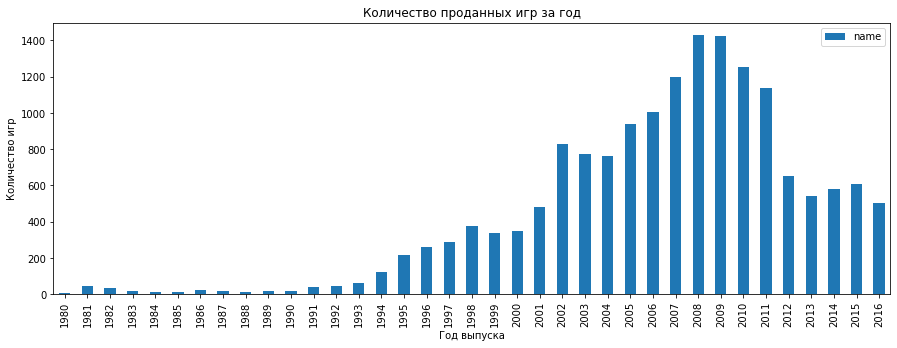

In [13]:
(
df.pivot_table(index='year_of_release', values='name', aggfunc='count')\
    .plot(kind='bar', figsize=(15,5), title=('Количество проданных игр за год'), xlabel='Год выпуска', ylabel='Количество игр')
)
plt.show();

**Вывод:** Как видно из данных, основной рост начинается в 2002 году с 829 тайтлами и его пик приходиться на 2008/2009 года с 1427 и 1426 тайтлами соотвественно, а после идет уже спад, который в 2012 довольно резок и в 2016 у нас всего 502, то есть за 8 лет число игр упало почти в 3 раза. Данные за все года нам врятли понадобяться, возьмем отрезок с 2012 года, когда произошел существенный спад.

### Посмотрим как менялись продажи по платформам

In [14]:
df_pivot = df.pivot_table(index=['platform'], values='total_sales', aggfunc='count')\
.sort_values(by='total_sales', ascending=False)
df_pivot

,total_sales
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


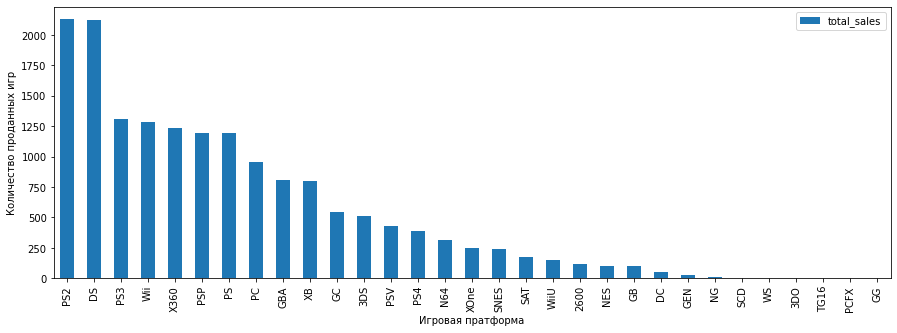

In [15]:
(
df.pivot_table(index='platform', values='total_sales', aggfunc='count')\
.sort_values(by='total_sales', ascending=False)\
    .plot(kind='bar', figsize=(15,5), xlabel='Игровая пратформа', ylabel='Количество проданных игр')
)
plt.show()

**Вывод:** Наибольшее число игр было продано для таких платформ как PS2 и DS их почти в 2 больше чем ближайшие PS3, Wii, X360, PSP, PS дальше уже идут платформы с числом продаж ниже 1000 экземпляров.

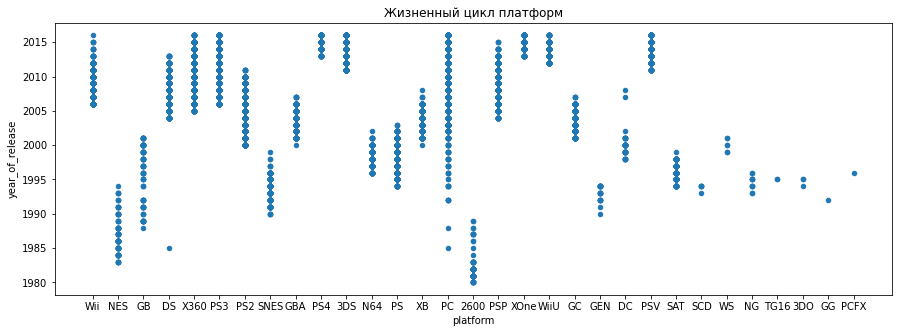

In [16]:
df.plot.scatter(x='platform', y='year_of_release', figsize=(15, 5))
plt.title('Жизненный цикл платформ')
plt.show();

**Вывод:** в среднем жизненный цикл консолей 8 - 12 лет, если разбивать их на версии или как единичные, но пк не собирается останавливаться

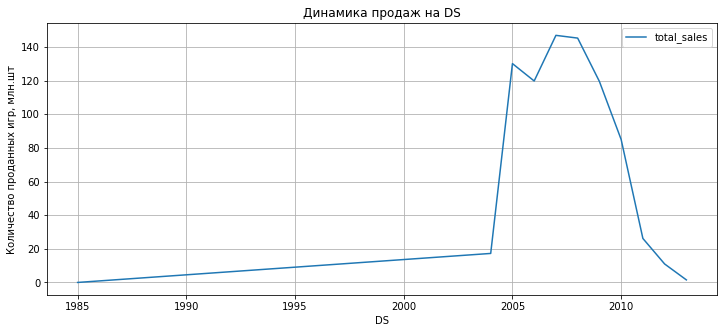

In [17]:
(
df.query('platform == "DS"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='DS', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на DS')
);

**Вывод:** Одна из самых древних консолей, но свой рост популярности у нее пришел на 2004г и продержался до 2008, после чего пошел низкий спад, оно и не удивительно, сменна поколений пользоватей и развитие технологий и появление более крутых платформ 

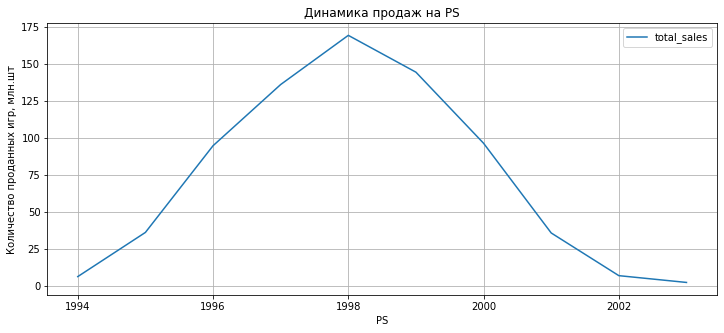

In [18]:
(
df.query('platform == "PS"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='PS', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на PS')
);

**Вывод:** Выход первой консоли от Sony произвел революцию и ее популярность стремительно росла на протяжение 4 лет вплоть до выхода следующей версии

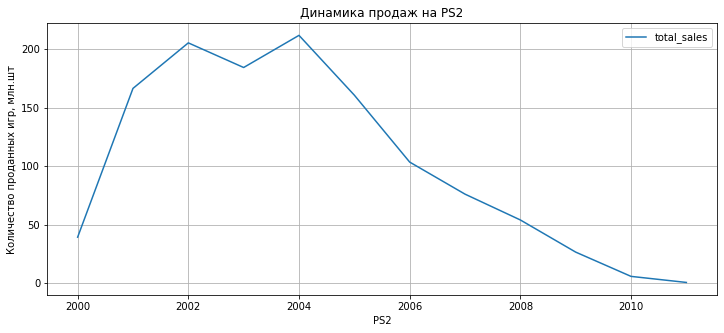

In [19]:
(
df.query('platform == "PS2"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='PS2', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на PS2')
);

**Вывод:** В 4 марта 2000г была выпущена консоль PS2 и она набрала огромную фан базу, до выхода PS3. В 2006г был намечен выход PS3, что и привело к снижению популярности PS2.

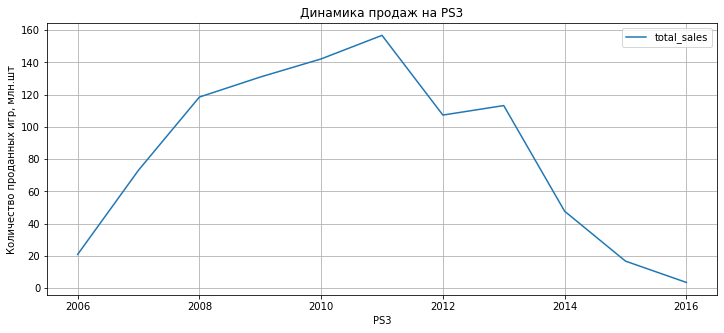

In [20]:
(
df.query('platform == "PS3"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='PS3', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на PS3')
);

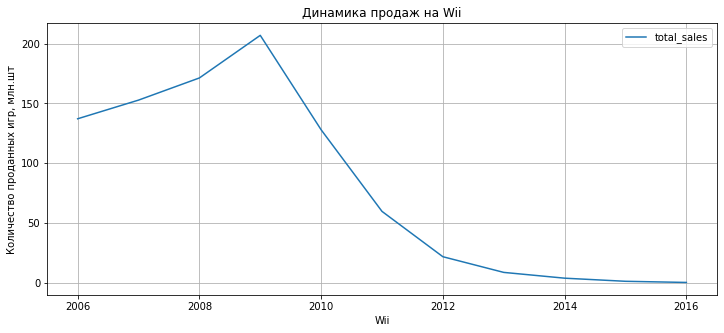

In [21]:
(
df.query('platform == "Wii"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='Wii', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на Wii')
);

**Вывод:** На старте был высокий спрос и динамика сохранялась 3 года, но после резко пошла на спад

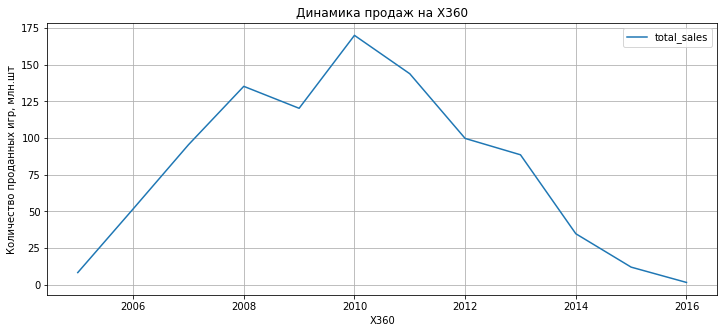

In [22]:
(
df.query('platform == "X360"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='X360', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на X360')
);

**Вывод:** Консоль от Microsoft создавалась как прямой конкуретнт Sony и как видно ее интерес был так же высок у пользователей

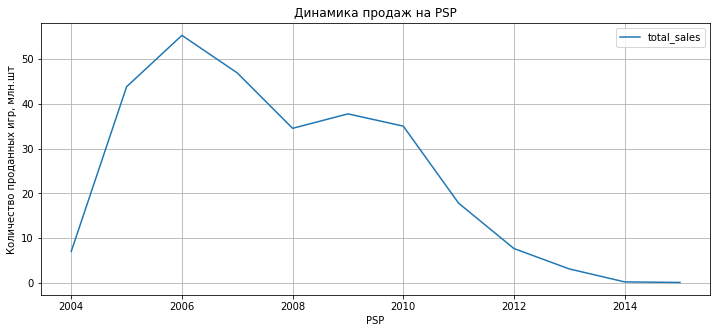

In [23]:
(
df.query('platform == "PSP"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='PSP', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на PSP')
);

**Вывод:** Не смотря на популярность полноценных консолей от Sony, портативная ее версия так же была хорошо воспринята среди пользователей, но конечно полноценной и конкуретной борьбы она не могла дать им

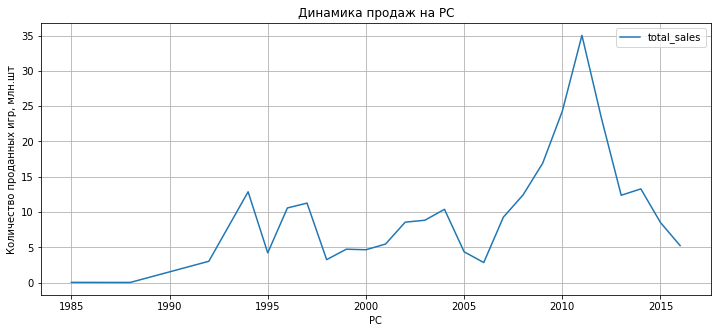

In [24]:
(
df.query('platform == "PC"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='PC', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на PC')
);

**Вывод:** Царь ПК появился одним из первых, но все мы знаем для чего и каким он был вначале своего пути, поэтому это консоль с большим потенциалом на будущее сильно зависящая от прогресса технологического

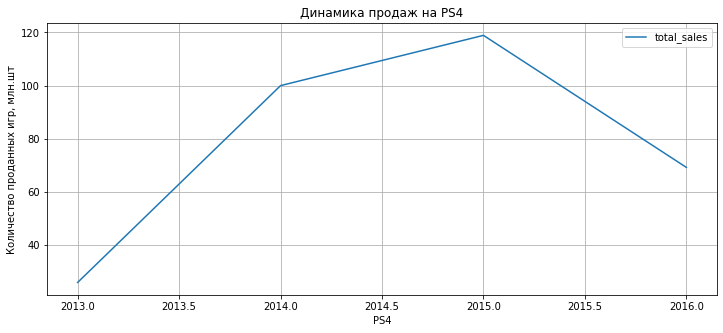

In [25]:
(
df.query('platform == "PS4"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='PS4', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на PS4')
);

**Вывод:** Очередная новая версия от Sony показала хороший рост

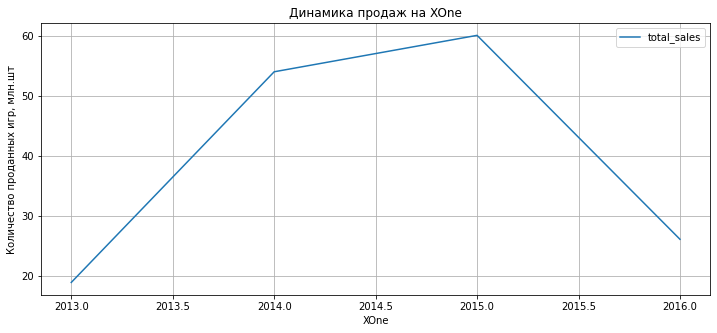

In [26]:
(
df.query('platform == "XOne"')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), xlabel='XOne', ylabel='Количество проданных игр, млн.шт', title='Динамика продаж на XOne')
);

**Вывод:** Как и прямой конкурентр PS4 так же на старте показала мощный рост 

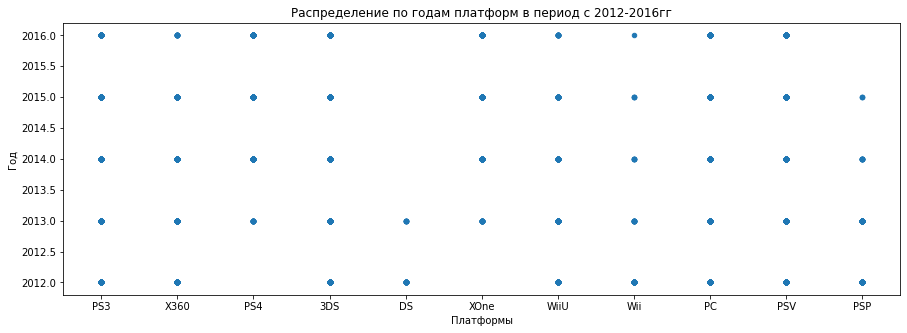

In [27]:
df.query('year_of_release >= 2012').plot.scatter(x='platform', y='year_of_release', figsize=(15,5))
plt.title('Распределение по годам платформ в период с 2012-2016гг')
plt.ylabel('Год')
plt.xlabel('Платформы')
plt.show()

**Вывод:** выберем наиболее перспективные платформы 

### Построим диаграмму размаха игр по платформам

In [28]:
row = df.query('["PS4", "WiiU", "3DS", "XOne", "PC"] in platform and year_of_release >= 2012')

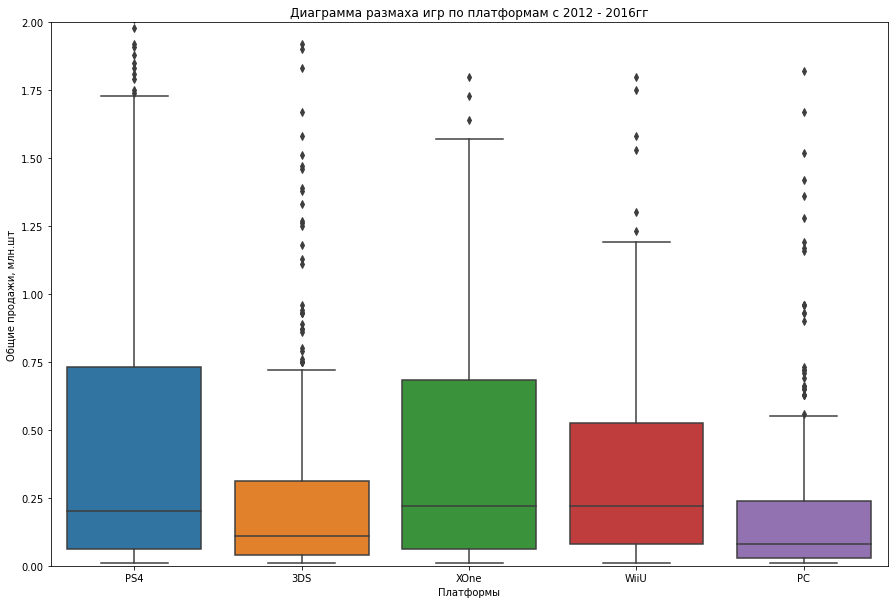

In [29]:
plt.figure(figsize=(15, 10))
(sns.boxplot(data = row, y = 'total_sales', x='platform')
    .set(title = 'Диаграмма размаха игр по платформам с 2012 - 2016гг', xlabel = 'Платформы', ylabel = 'Общие продажи, млн.шт'))
plt.ylim(0, 2)
plt.show()

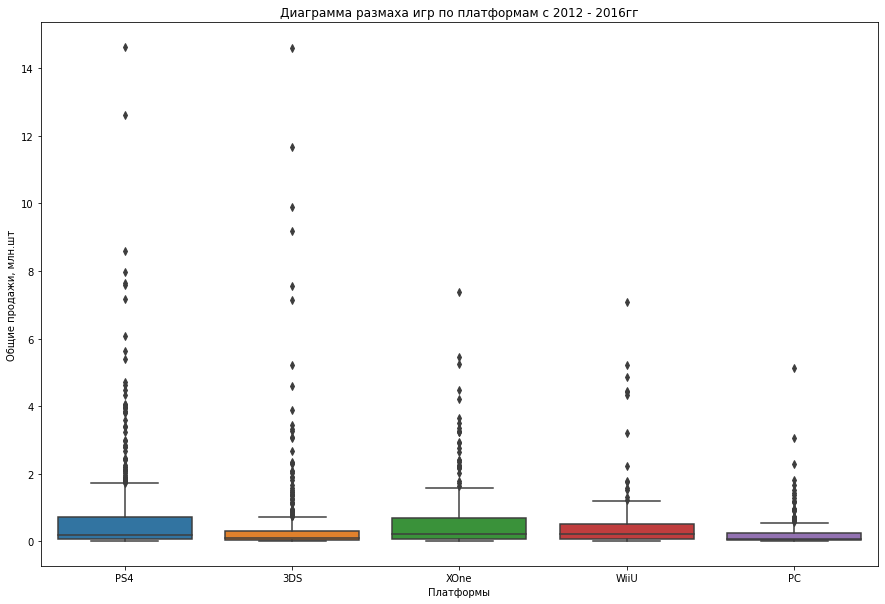

In [30]:
plt.figure(figsize=(15, 10))
(sns.boxplot(data = row, y = 'total_sales', x='platform')
    .set(title = 'Диаграмма размаха игр по платформам с 2012 - 2016гг', xlabel = 'Платформы', ylabel = 'Общие продажи, млн.шт'))
plt.show()

**Вывод:** на графиках видно что медианное значение около 0.25 млн.шт. Лучше всего результаты у PS4, XOne, WiiU

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [31]:
potencial_platform = ["PS4", "WiiU", "3DS", "XOne", "PC"]

In [32]:
actual_period = df.query('year_of_release >= 2012').reset_index()

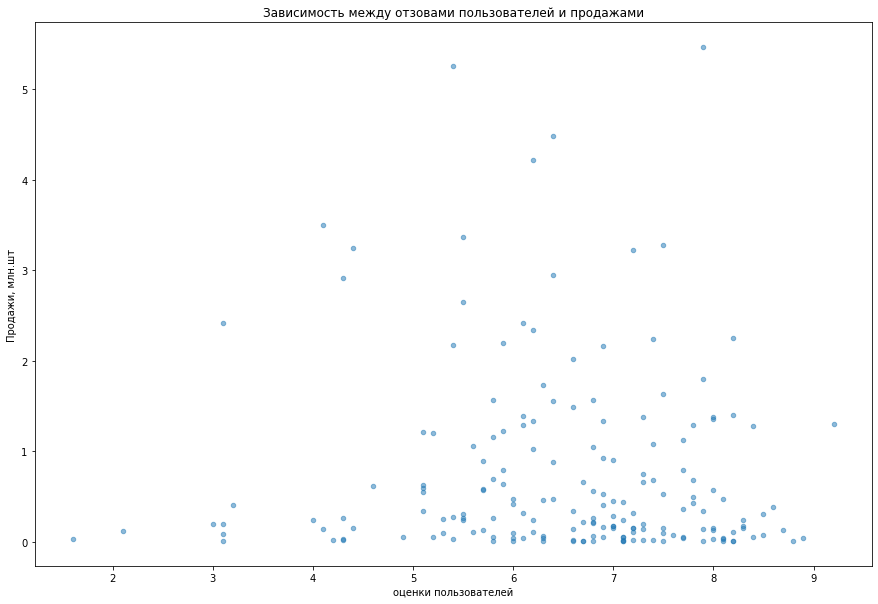

Корреляция между оценками пользователей и продажами: -0.0689250532827941


In [33]:
corr_graf = actual_period.query('platform == "XOne"')
corr_graf.plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10), title='Зависимость между отзовами пользователей и продажами', xlabel='оценки пользователей', alpha=0.5, ylabel='Продажи, млн.шт')
plt.show()
print('Корреляция между оценками пользователей и продажами:', corr_graf['user_score'].corr(corr_graf['total_sales']))

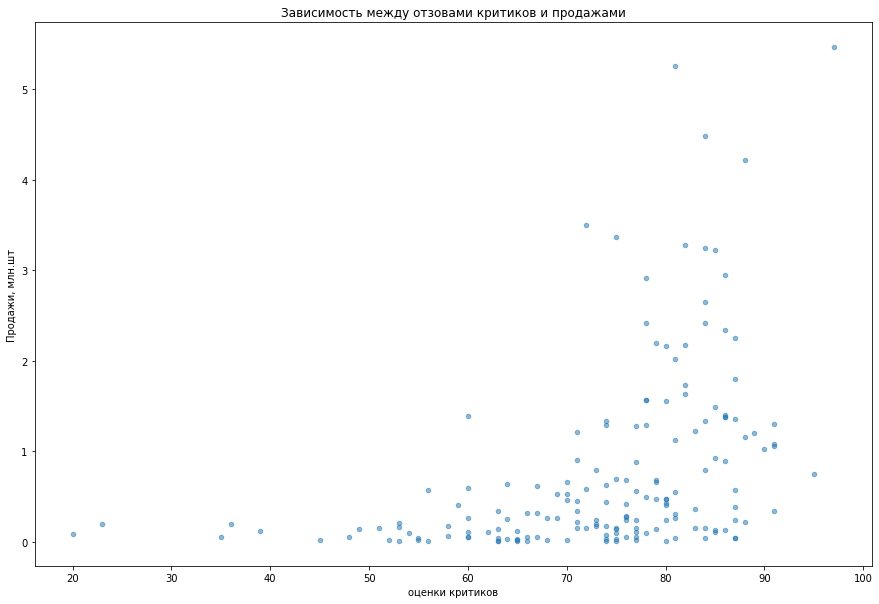

Корреляция между оценками пользователей и продажами: 0.4169983280084017


In [34]:
corr_graf = actual_period.query('platform == "XOne"')
corr_graf.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10), title='Зависимость между отзовами критиков и продажами', xlabel='оценки критиков', alpha=0.5, ylabel='Продажи, млн.шт')
plt.show()
print('Корреляция между оценками пользователей и продажами:', corr_graf['critic_score'].corr(corr_graf['total_sales']))

**Вывод:** Оценки критиков имею большую линейную взаимосвязь нежели оценки пользоватей, но все равно не такую сильную чтобы можно было сказать что критики напрямую влияют на популярнойсть платформы и как следсвие на ее продажи.

In [35]:
for i, j in actual_period.groupby('platform'):
    print(i)
    print("Корреляция между оценками пользователей и продажами:", j['user_score'].corr(j['total_sales']))
    print("Корреляция между оценками критиков и продажами:", j['critic_score'].corr(j['total_sales']))
    print()

3DS
Корреляция между оценками пользователей и продажами: 0.19758263411038599
Корреляция между оценками критиков и продажами: 0.3208028695360785

DS
Корреляция между оценками пользователей и продажами: 0.88270872757644
Корреляция между оценками критиков и продажами: nan

PC
Корреляция между оценками пользователей и продажами: -0.12186747630735574
Корреляция между оценками критиков и продажами: 0.23724324311567915

PS3
Корреляция между оценками пользователей и продажами: -0.005143522887113811
Корреляция между оценками критиков и продажами: 0.3314972592629587

PS4
Корреляция между оценками пользователей и продажами: -0.031957110204556397
Корреляция между оценками критиков и продажами: 0.40656790206178106

PSP
Корреляция между оценками пользователей и продажами: -0.8023020619393209
Корреляция между оценками критиков и продажами: nan

PSV
Корреляция между оценками пользователей и продажами: -0.004339437514314852
Корреляция между оценками критиков и продажами: 0.09448789929316173

Wii
Коррел

**Вывод:** Так же как и для каждой отдельной игровой платформы, результат корреляций и  линейная взаимосвязь не такая тесная в общем по всем продажам и оценкам. Между оценкой пользователей коэффициент Пирсона близок к 0, что говорит о том что взаимосвязь практически отсутсвует. С оценкой критиков взаимосвязь выше, но не сказать что прям сильно влияет на продажи. 

### Посмотрим, есть ли зависимость от жанра игры и ее продажами

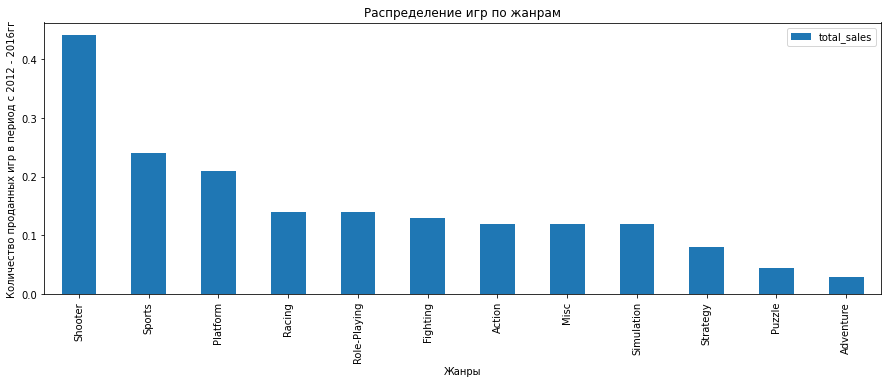

In [36]:
(
actual_period\
.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)\
.plot(kind='bar', figsize=(15,5), title='Распределение игр по жанрам', xlabel='Жанры', ylabel='Количество проданных игр в период с 2012 - 2016гг'));


**Вывод:** Игры  жанра  sports, shooter являтся наиболее продаваемыми

## Портрет пользователя для каждого региона продаж

In [37]:
period = df.query('year_of_release >= 2012').reset_index()

**Проведем анализ для региона NA**

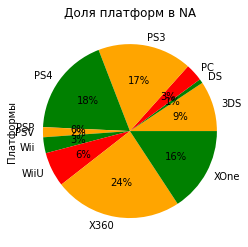

In [38]:
period.groupby(['platform']).sum().plot(kind='pie', y='na_sales', ylabel='Платформы', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля платформ в NA');

**Вывод**: Самая популярная платформа в NA - PS3 и X360

In [39]:
period = df.query('year_of_release >= 2014').reset_index()

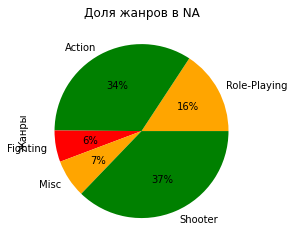

In [40]:
period.groupby(['genre']).sum().sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', ylabel='Жанры', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля жанров в NA');

**Вывод:** Жанра экшен и шутеры лидируют над остальными жанрами

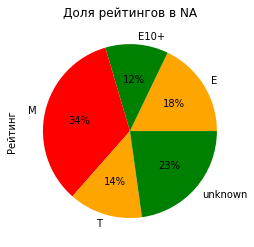

In [41]:
period.groupby(['rating']).sum().plot(kind='pie', y='na_sales', ylabel='Рейтинг', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля рейтингов в NA');

**Проведем анализ для региона EU**

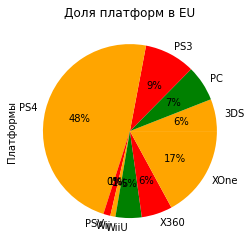

In [42]:
period.groupby(['platform']).sum().plot(kind='pie', y='eu_sales', ylabel='Платформы', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля платформ в EU');

**Вывод:** В EU PS4 лидирует по популярности, не много остстает PS3

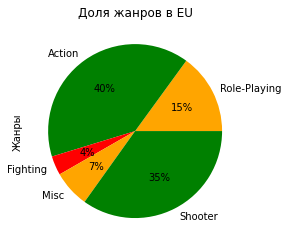

In [43]:
period.groupby(['genre']).sum().sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', ylabel='Жанры', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля жанров в EU');

**Вывод:** В EU так же как и в NA любят экшены и шутеры суммарно более 70% пользователей

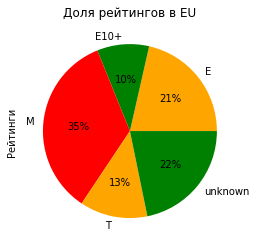

In [44]:
period.groupby(['rating']).sum().plot(kind='pie', y='eu_sales', ylabel='Рейтинги', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля рейтингов в EU');

**Проведем анализ для региона JP**

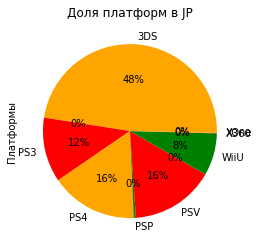

In [45]:
period.groupby(['platform']).sum().plot(kind='pie', y='jp_sales', ylabel='Платформы', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля платформ в JP');

**Вывод:** 3DS на удивление лидирует

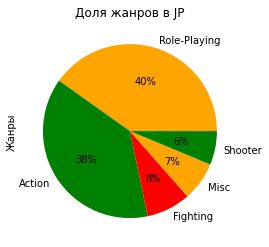

In [46]:
period.groupby(['genre']).sum().sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', ylabel='Жанры', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля жанров в JP');

**Вывод:** экшены любят везде, но еще в JP любят больше ролевые игры

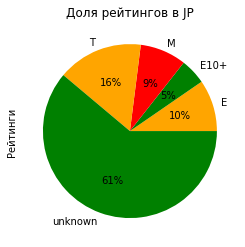

In [47]:
period.groupby(['rating']).sum().plot(kind='pie', y='jp_sales', ylabel='Рейтинги', autopct='%1.0f%%', legend=False,
 colors = ['orange', 'green', 'red'],
 title='Доля рейтингов в JP');

**Вывод:** Рейтинги в таких регионах как EU & NA популярнее всего имеют маркировку "М", а вот в JP самое большое число у значений "Unknown", но это нормально, так как организация ESRB курирует США и Канаду, поэтому игры разработанные в этих страннах и в них заполняется рейтинг

## Проверим гипотезы

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC разные

In [48]:
res = st.ttest_ind(
    actual_period.query('platform == "XOne" and user_score.notna()')['user_score'],
    actual_period.query('platform == "PC" and user_score.notna()')['user_score'],
    equal_var=False)

alpha = .05

print('p-значение:', res.pvalue)

if res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод:** входе тестирование при помощи двустороннего t-test Стьюдента, стало понятно что H0 неопровержима 

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.


**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные.

In [49]:
res = st.ttest_ind(
    actual_period.query('genre == "Action" and user_score.notna()')['user_score'],
    actual_period.query('genre == "Sports" and user_score.notna()')['user_score'],
    equal_var=False)

alpha = .05

print('p-значение:', res.pvalue)

if res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод:** входе тестирование при помощи двустороннего t-test Стьюдента, стало понятно что H0 мы отвергаем

## Итоговый вывод

Целью данного иследованния было выявить потенциально популярный продукт на 2017 год. Входе иследованния были выявлены популярные за последние годы и набирающие свою популярность игровые платформы такие как "PS4", "WiiU", "3DS", "XOne", "PC". Игры как и железо прогрессирует и развиваются очень быстро, поэтому можно сделать такое предположение что стоит вкладываться в рекламу консолей последнего покаления и пк. Что касаемо жанров и рейтингов, то здесь все немного не однозначно для Европы с Северной Америкой и Японией. Потому как Япония сильно отличается и там другой спрос на виды платформ и жанры игр. К тому же рейтинг распростроняется на игры созданные в США и Канаде, поэтому мы видим столько "неопреденных" рейтингов в Японии.